In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
data = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_synthetic_wide.csv")

In [29]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Chinstrap,Dream,49.578723,30.000000,190,3280,male
2,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
3,Adelie,Biscoe,44.907998,25.894140,204,3665,female
4,Adelie,Dream,26.304201,13.736113,160,8000,male


In [30]:
data.shape

(1500, 7)

In [31]:
input = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex','species','island']]
input.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
0,51.211594,10.784101,198,6536,female,Gentoo,Biscoe
1,49.578723,30.000000,190,3280,male,Chinstrap,Dream
2,54.473814,16.435158,208,4077,female,Gentoo,Biscoe
3,44.907998,25.894140,204,3665,female,Adelie,Biscoe
4,26.304201,13.736113,160,8000,male,Adelie,Dream


In [32]:
LE = LabelEncoder()

In [33]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Create new columns for encoded values
input['Species_n'] = LE.fit_transform(input['species'])
input['Island_n']  = LE.fit_transform(input['island'])
input['Sex_n'] = LE.fit_transform(input['sex'])

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_22564\1059042608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Species_n'] = LE.fit_transform(input['species'])
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_22564\1059042608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Island_n']  = LE.fit_transform(input['island'])
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_22564\1059042608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [34]:
input

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,island,Species_n,Island_n,Sex_n
0,51.211594,10.784101,198,6536,female,Gentoo,Biscoe,2,0,0
1,49.578723,30.000000,190,3280,male,Chinstrap,Dream,1,1,1
2,54.473814,16.435158,208,4077,female,Gentoo,Biscoe,2,0,0
3,44.907998,25.894140,204,3665,female,Adelie,Biscoe,0,0,0
4,26.304201,13.736113,160,8000,male,Adelie,Dream,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1495,39.129537,15.963502,226,3325,female,Gentoo,Biscoe,2,0,0
1496,31.841796,21.379096,181,4030,female,Adelie,Biscoe,0,0,0
1497,41.027337,29.101908,213,4013,female,Adelie,Torgersen,0,2,0
1498,47.544529,16.402925,210,5488,female,Gentoo,Biscoe,2,0,0


In [35]:
input.drop(axis=1,columns='sex',inplace=True)
input.drop(axis=1,columns='species',inplace=True)
input.drop(axis=1,columns='island',inplace=True)

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_22564\3900912574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='sex',inplace=True)
C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_22564\3900912574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input.drop(axis=1,columns='species',inplace=True)


In [36]:
input.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_n,Island_n,Sex_n
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,44.855678,18.209765,201.434667,4210.080667,0.899333,0.635333,0.516667
std,9.242021,7.371352,22.064775,1290.829799,0.889416,0.721132,0.499889
min,25.000000,10.000000,160.000000,2000.000000,0.000000,0.000000,0.000000
25%,38.194683,14.948490,185.750000,3316.000000,0.000000,0.000000,0.000000
50%,44.742382,17.219552,200.000000,4107.000000,1.000000,0.000000,1.000000
75%,51.175820,19.545472,216.000000,5026.250000,2.000000,1.000000,1.000000
max,70.000000,91.000000,260.000000,8000.000000,2.000000,2.000000,1.000000


In [37]:
#input = input.dropna(axis = 0)
input = input.fillna(input.mean())

In [38]:
features = input[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']]
features.shape

(1500, 6)

In [39]:
target=input[['Species_n']]
target.shape

(1500, 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.30, random_state= 7)

In [41]:
X_test.shape

(450, 6)

In [42]:
model = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [44]:
model.score(X_train, y_train)

0.9542857142857143

In [45]:
model.score(X_test, y_test)

0.8488888888888889

In [46]:
model.feature_importances_

array([0.36419867, 0.07143477, 0.10437562, 0.07693012, 0.0009382 ,
       0.38212262])

In [47]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Sex_n,Island_n
547,43.274126,16.519709,187,3595,1,0
984,53.300135,19.258105,187,2508,0,1
712,48.646311,13.999107,209,4780,1,0
638,43.718130,15.929508,210,6225,0,0
471,35.840625,19.473044,170,3762,0,1
...,...,...,...,...,...,...
976,40.160365,13.651374,174,4235,1,0
755,39.069906,21.282749,197,5946,1,0
881,48.501273,10.120140,260,5448,0,0
964,30.608198,10.369220,199,5019,0,2


In [48]:
y_test

,Species_n
547,0
984,1
712,2
638,2
471,0
...,...
976,0
755,0
881,2
964,0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
import pandas as pd

# Assuming you already have your encoded dataset
# Features and target
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']
y = input['Species_n']   # encoded species column (target)

# Loop through all feature combinations
for r in range(1, len(features)+1):
    for subset in combinations(features, r):
        X = input[list(subset)]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Build Decision Tree classifier
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Print test accuracy
        print(subset, "->", model.score(X_test, y_test))


('bill_length_mm',) -> 0.4955555555555556
('bill_depth_mm',) -> 0.41333333333333333
('flipper_length_mm',) -> 0.6022222222222222
('body_mass_g',) -> 0.4911111111111111
('Sex_n',) -> 0.46
('Island_n',) -> 0.6777777777777778
('bill_length_mm', 'bill_depth_mm') -> 0.6022222222222222
('bill_length_mm', 'flipper_length_mm') -> 0.6133333333333333
('bill_length_mm', 'body_mass_g') -> 0.5977777777777777
('bill_length_mm', 'Sex_n') -> 0.5088888888888888
('bill_length_mm', 'Island_n') -> 0.74
('bill_depth_mm', 'flipper_length_mm') -> 0.5288888888888889
('bill_depth_mm', 'body_mass_g') -> 0.54
('bill_depth_mm', 'Sex_n') -> 0.39111111111111113
('bill_depth_mm', 'Island_n') -> 0.6555555555555556
('flipper_length_mm', 'body_mass_g') -> 0.5777777777777777
('flipper_length_mm', 'Sex_n') -> 0.5577777777777778
('flipper_length_mm', 'Island_n') -> 0.7133333333333334
('body_mass_g', 'Sex_n') -> 0.4955555555555556
('body_mass_g', 'Island_n') -> 0.7111111111111111
('Sex_n', 'Island_n') -> 0.6777777777777778

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
import pandas as pd

# Features and target
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']
y = input['Species_n']   # encoded species column (target)

results = []  # to store (accuracy, subset)

# Loop through all feature combinations
for r in range(1, len(features)+1):
    for subset in combinations(features, r):
        X = input[list(subset)]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Build Decision Tree classifier
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Store accuracy
        acc = model.score(X_test, y_test)
        results.append((acc, subset))

# Sort results by accuracy (descending)
results.sort(reverse=True, key=lambda x: x[0])

# Print neatly
for acc, subset in results:
    print(f"{subset} -> {acc:.4f}")


('bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'Island_n') -> 0.8644
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Island_n') -> 0.8644
('bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.8600
('bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'Island_n') -> 0.8511
('bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.8511
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.8511
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'Island_n') -> 0.8378
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'Sex_n', 'Island_n') -> 0.8356
('bill_length_mm', 'bill_depth_mm', 'Sex_n', 'Island_n') -> 0.8267
('bill_length_mm', 'body_mass_g', 'Sex_n', 'Island_n') -> 0.8222
('bill_length_mm', 'bill_depth_mm', 'Island_n') -> 0.8200
('bill_length_mm', 'body_mass_g', 'Island_n') -> 0.8178
('bill_length_mm', 'flipper_length_mm', 'Sex_n', 'Island_n') -> 0.8089
(

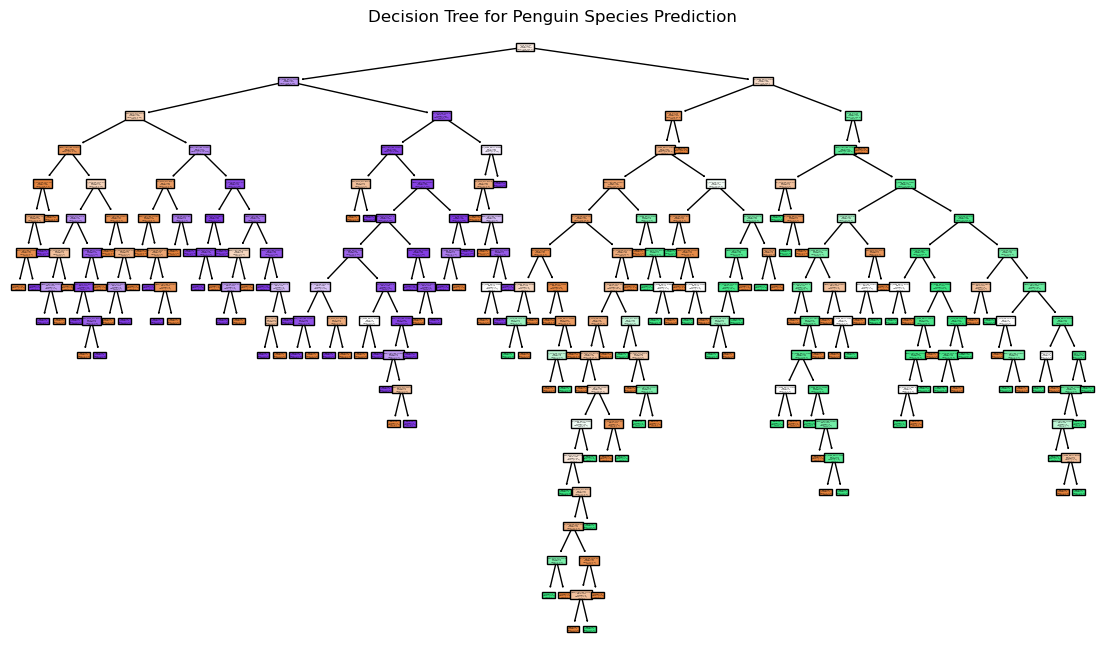

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the data
# Step 2: Select features and target
features = input[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','Sex_n','Island_n']]

# Replace 'Target' with the actual target column name in your CSV (e.g., 'Kidney_Disease')
target = input['Species_n'] 

# Step 3: Split the dataset (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(
    clf, 
    feature_names=features.columns.tolist(),  # <-- convert to list
    class_names=[str(cls) for cls in clf.classes_],
    filled=True
)

plt.title("Decision Tree for Penguin Species Prediction")
plt.show()

